In [1]:

import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/lifestyle-and-wellbeing-data/Wellbeing_and_lifestyle_data.csv


In [39]:
data=pd.read_csv('/kaggle/input/lifestyle-and-wellbeing-data/Wellbeing_and_lifestyle_data.csv')

data=data[data.DAILY_STRESS !='1/1/00']
data['DAILY_STRESS']=pd.to_numeric(data['DAILY_STRESS'])
data.columns=[x[0]+x[1:].lower()for x in data.columns]
data

,Timestamp,Fruits_veggies,Daily_stress,Places_visited,Core_circle,Supporting_others,Social_network,Achievement,Donation,Bmi_range,...,Live_vision,Sleep_hours,Lost_vacation,Daily_shouting,Sufficient_income,Personal_awards,Time_for_passion,Daily_meditation,Age,Gender
0,7/7/15,3,2,2,5,0,5,2,0,1,...,0,7,5,5,1,4,0,5,36 to 50,Female
1,7/7/15,2,3,4,3,8,10,5,2,2,...,5,8,2,2,2,3,2,6,36 to 50,Female
2,7/7/15,2,3,3,4,4,10,3,2,2,...,5,8,10,2,2,4,8,3,36 to 50,Female
3,7/7/15,3,3,10,3,10,7,2,5,2,...,0,5,7,5,1,5,2,0,51 or more,Female
4,7/7/15,5,1,3,3,10,4,2,4,2,...,0,7,0,0,2,8,1,5,51 or more,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12751,2/23/2020 22:03:56,3,4,10,8,10,8,6,5,1,...,3,7,0,1,1,10,6,7,21 to 35,Female
12752,2/24/2020 2:44:30,3,3,6,5,2,5,1,0,2,...,0,7,0,0,2,3,0,2,36 to 50,Female
12753,2/24/2020 10:35:02,4,4,7,5,3,3,4,2,1,...,5,6,0,2,2,6,3,5,36 to 50,Female
12754,2/24/2020 12:54:10,3,3,10,4,8,10,3,3,1,...,1,6,0,1,1,10,1,10,21 to 35,Female


###  In a study about daily habits, the Work-Life Balance survey evaluates how we thrive in both professional and personal lives: it was mainly about 5 aspects of our lives:
### 1. Healthy body, reflecting your fitness and healthy habits;
### 2. Healthy mind, indicating how well you embrace positive emotions;
### 3. Expertise, measuring the ability to grow your expertise and achieve something unique;
### 4. Connection, assessing the strength of your social network and your inclination to discover the world;
### 5. Meaning, evaluating your compassion, generosity and how much 'you are living the life of your dream'.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 <a list of 19 Text major ticklabel objects>)

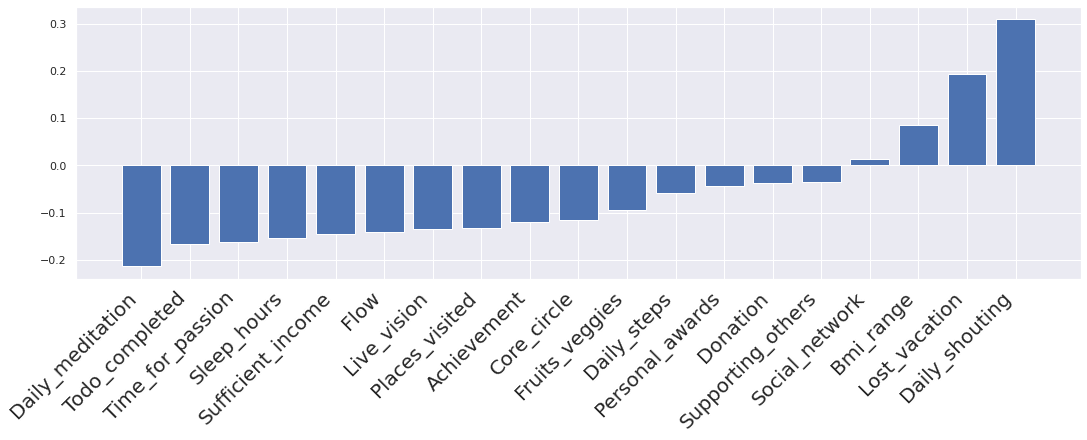

In [40]:
corr_stress=pd.DataFrame(data.corr(method='pearson').loc['Daily_stress',:])

corr_stress.sort_values(by='Daily_stress', inplace=True)
corr_stress.drop(['Daily_stress'],inplace=True)

sns.set()
f, ax = plt.subplots(figsize=(18,5))
plt.bar(corr_stress.index,corr_stress['Daily_stress'])
plt.xticks(rotation=45,fontsize=20, horizontalalignment="right")

## A clear overview of the correlation between the  attributes studied and the daily stress

(-1.1107867153918916,
 1.1017403274628845,
 -1.111661259510197,
 1.1005552980719142)

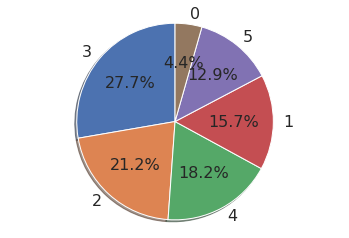

In [4]:
stress_data=(data['Daily_stress'].value_counts()*100)/(data.shape[0])

fig1, ax1 = plt.subplots()
ax1.pie(stress_data, labels=stress_data.index, autopct='%1.1f%%',shadow=True, startangle=90,textprops={'fontsize': 16})
ax1.axis('equal')


## 30 % of the respondents qualify themselves as highly stressed

In [5]:
def plotsns(data,param,x_lab,y_lab):
    sns.set()
    fig=data.set_index(param).T.plot(kind='bar', stacked=True,colormap=ListedColormap(sns.color_palette("GnBu", 10)),figsize=(12,12))
    sns.set_style("whitegrid", {'axes.grid' : False})
    fig.set_ylabel(y_lab, fontsize=18)
    fig.set_xlabel(x_lab, fontsize=18)
    fig.tick_params(rotation= 45,labelsize=20)

    
def percentage(data_p):
    summ=data_p.sum(axis=0)
    data_p=data_p*100/summ
    return data_p

# The mose stressful 30 years:

## The age ranges: 36 to 50 and 21 to 35, are the most stressed

In [49]:

data_age=pd.concat([data['Daily_stress'],pd.get_dummies(data['Age'])],axis=1).groupby('Daily_stress').sum()
data_age.index.name='Daily_stress'
data_age=percentage(data_age)

data_age

,21 to 35,36 to 50,51 or more,Less than 20
Daily_stress,,,,
0,3.593303,3.519956,6.026786,6.213965
1,14.842793,13.386918,19.456845,16.912236
2,21.906901,21.563193,20.014881,19.795003
3,28.848510,28.021064,25.930060,26.521461
4,18.191098,19.484479,17.113095,17.040359
5,12.617395,14.024390,11.458333,13.516976


# Comparison of the 22 attributes for the 4 age ranges

In [41]:
data_age=pd.get_dummies(data['Age'])

data_num=pd.DataFrame(data.drop(['Timestamp','Gender','Age'],axis=1))

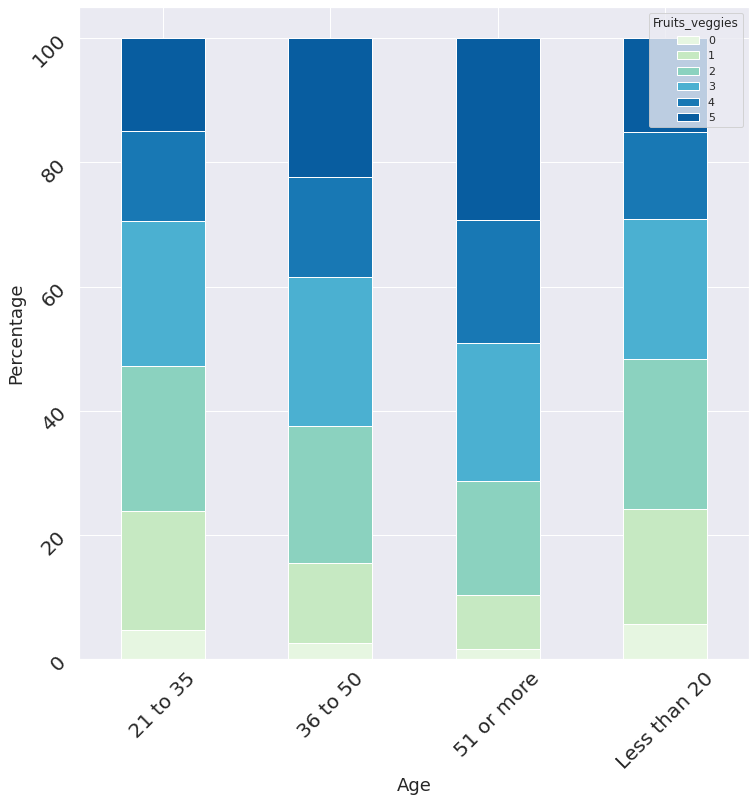

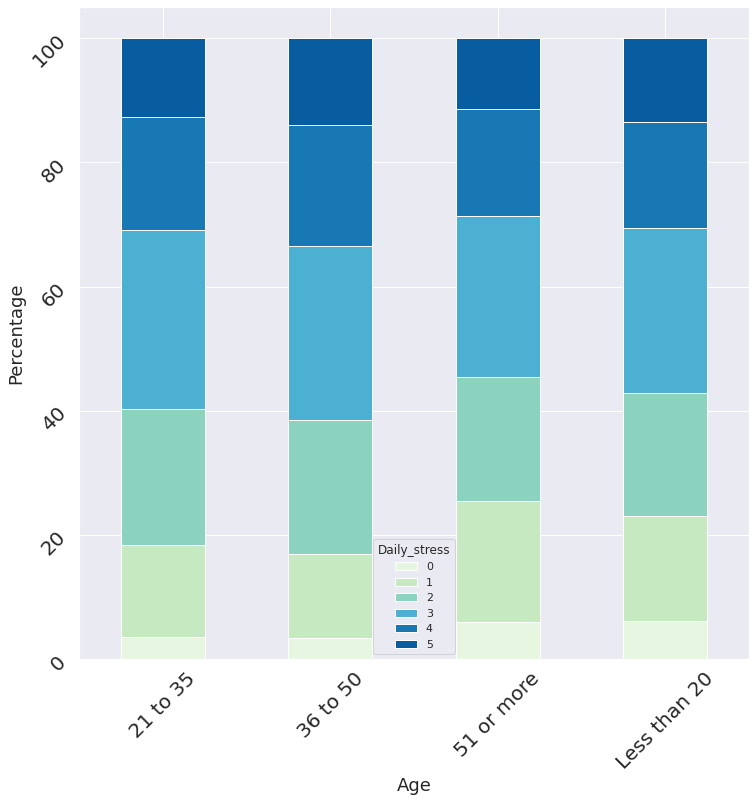

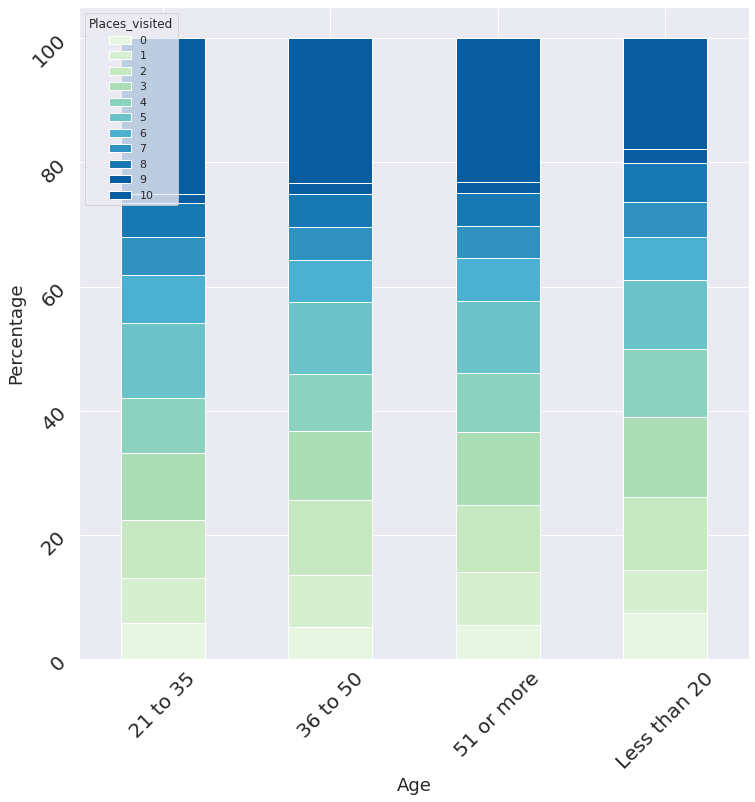

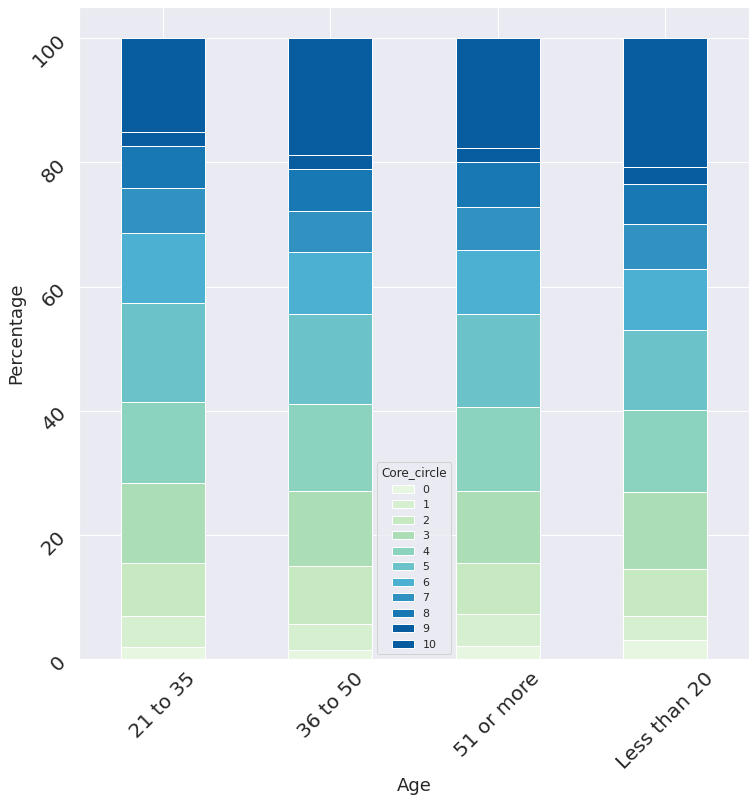

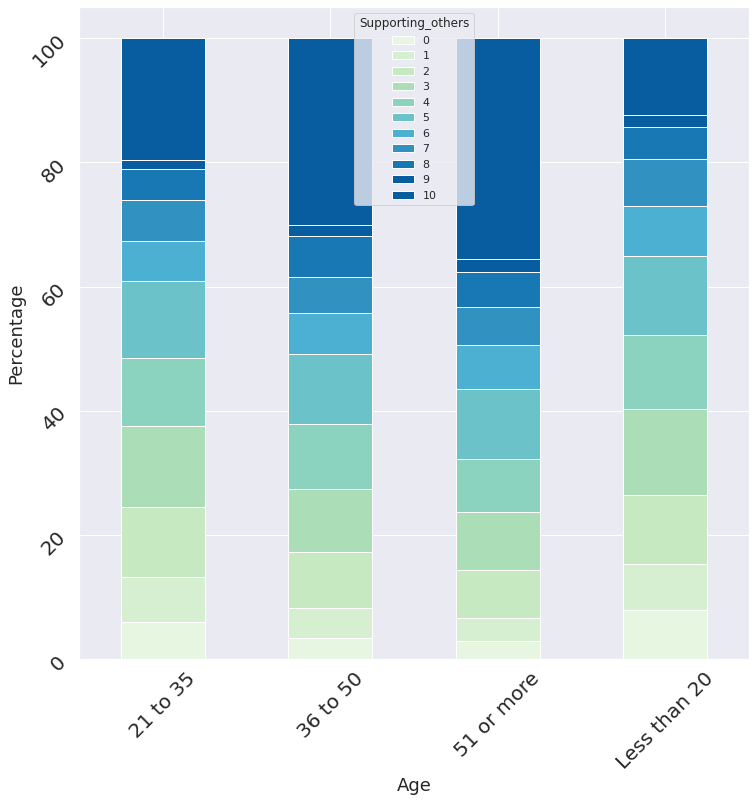

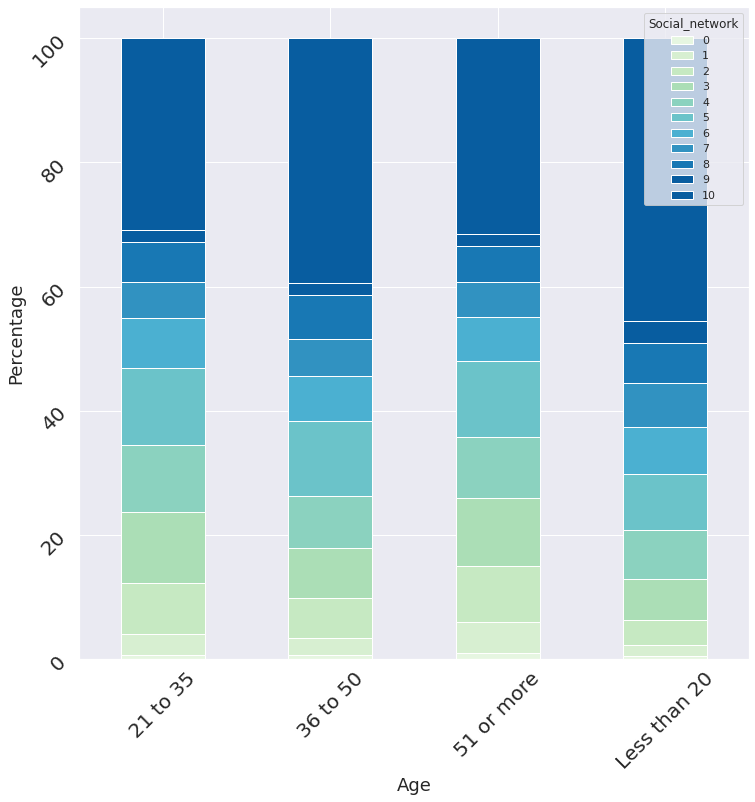

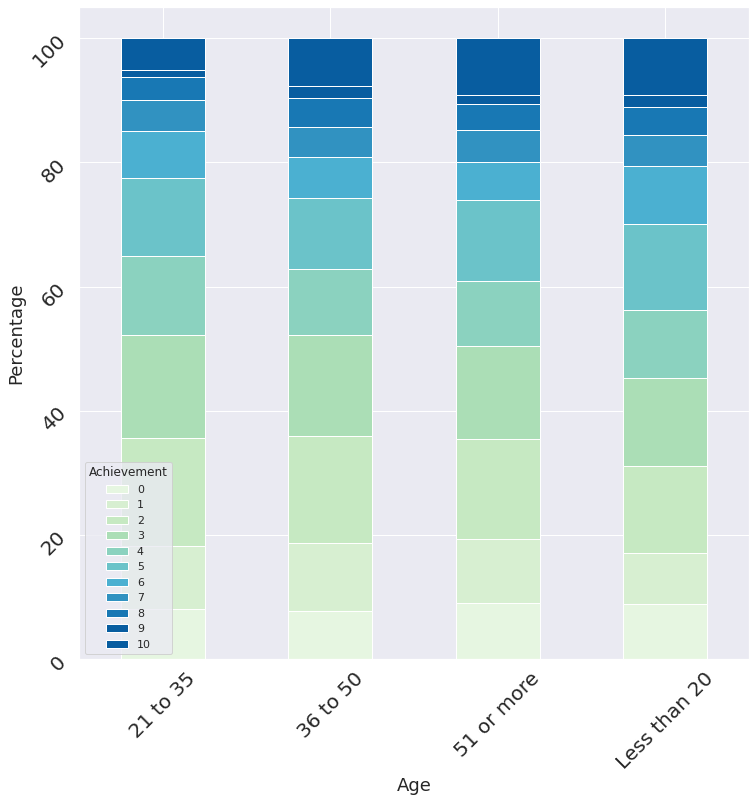

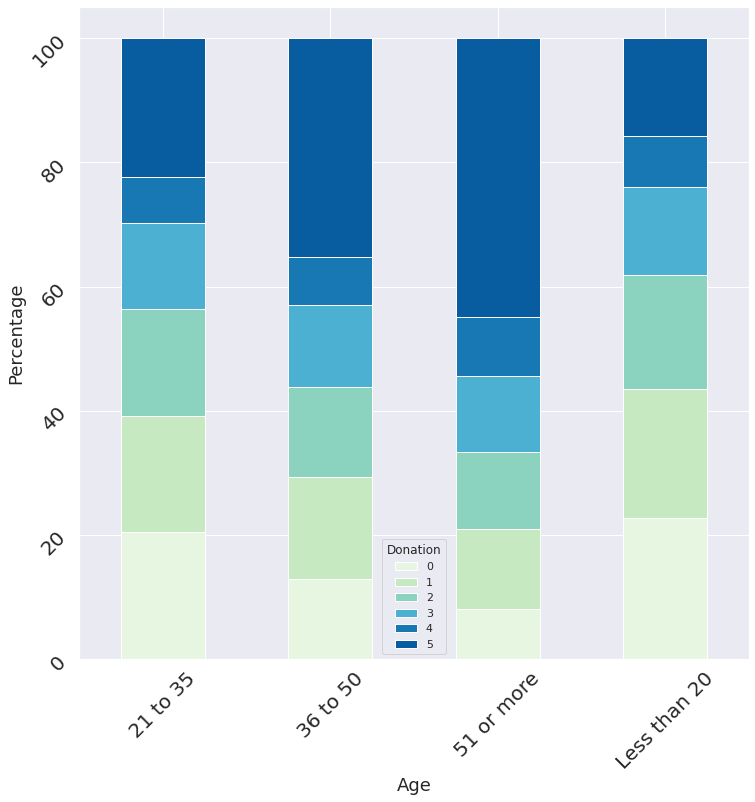

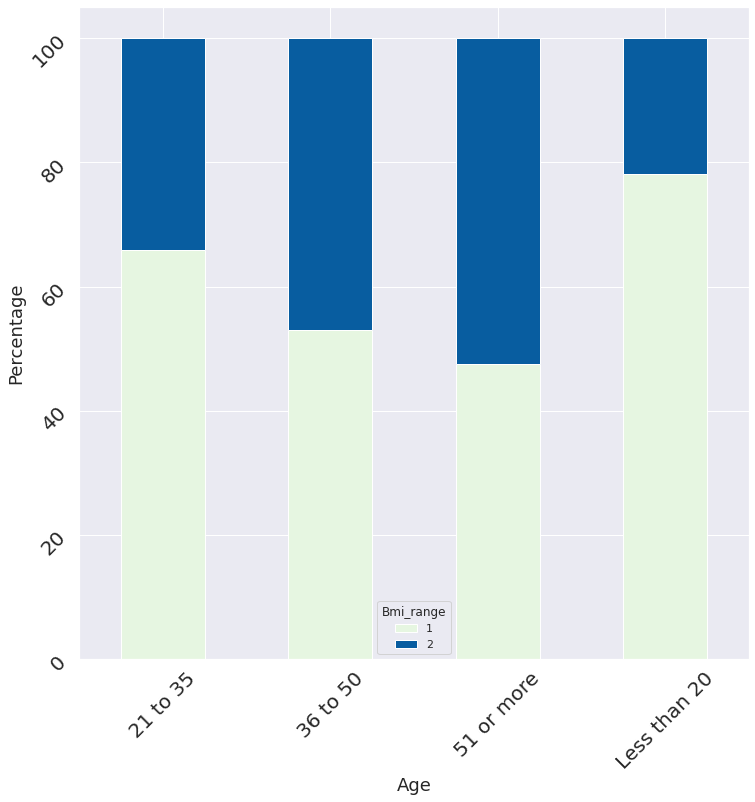

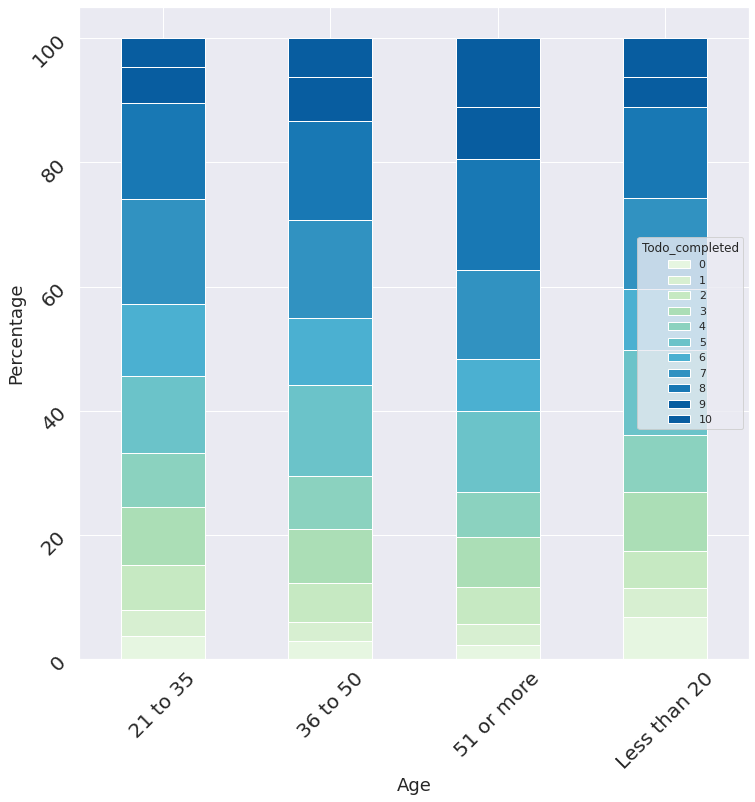

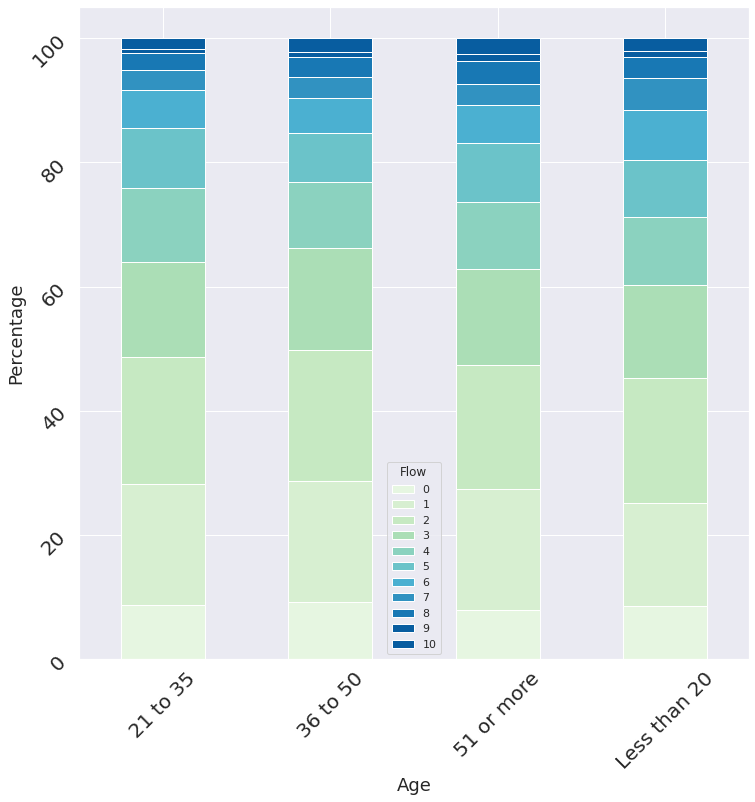

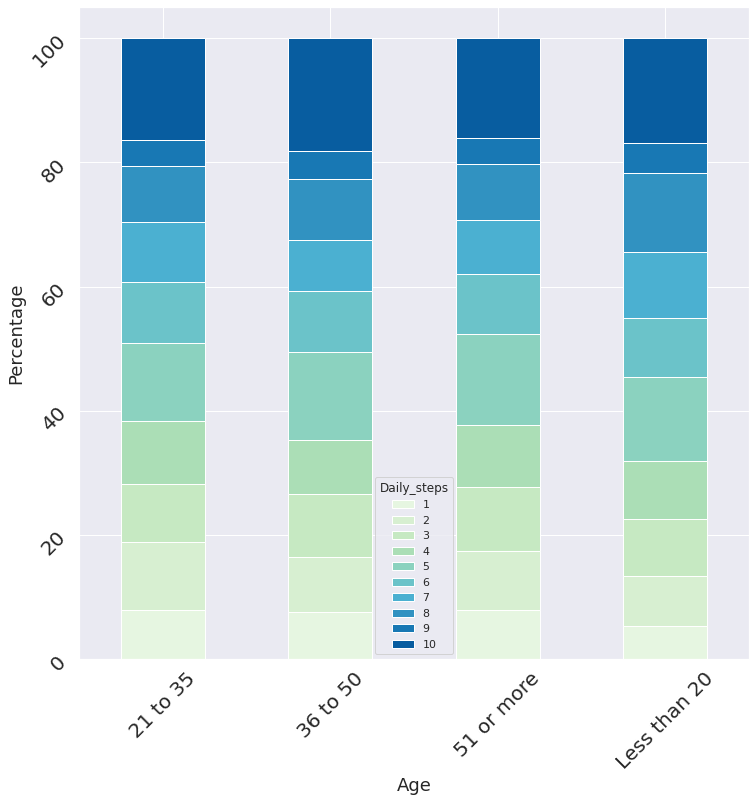

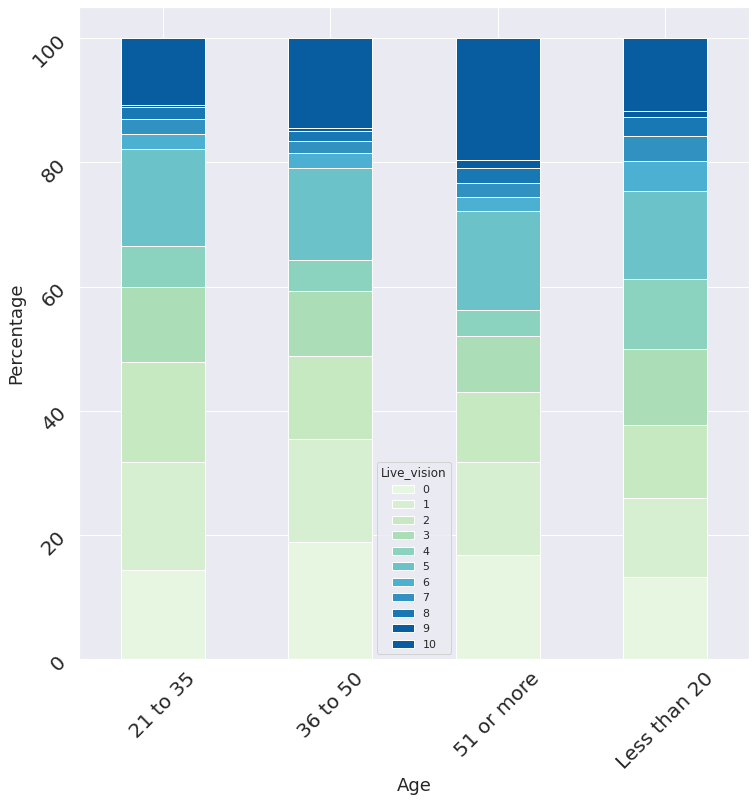

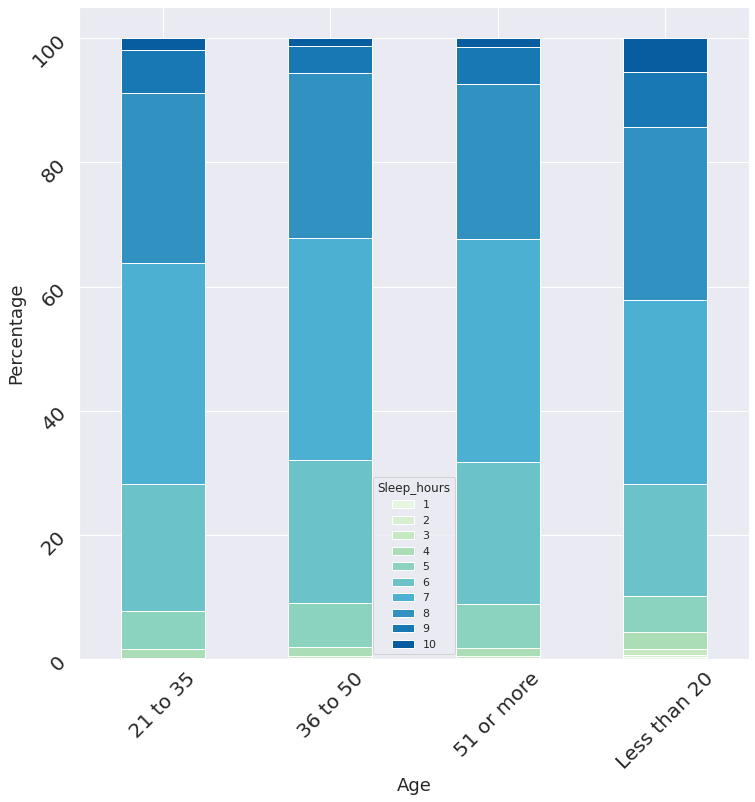

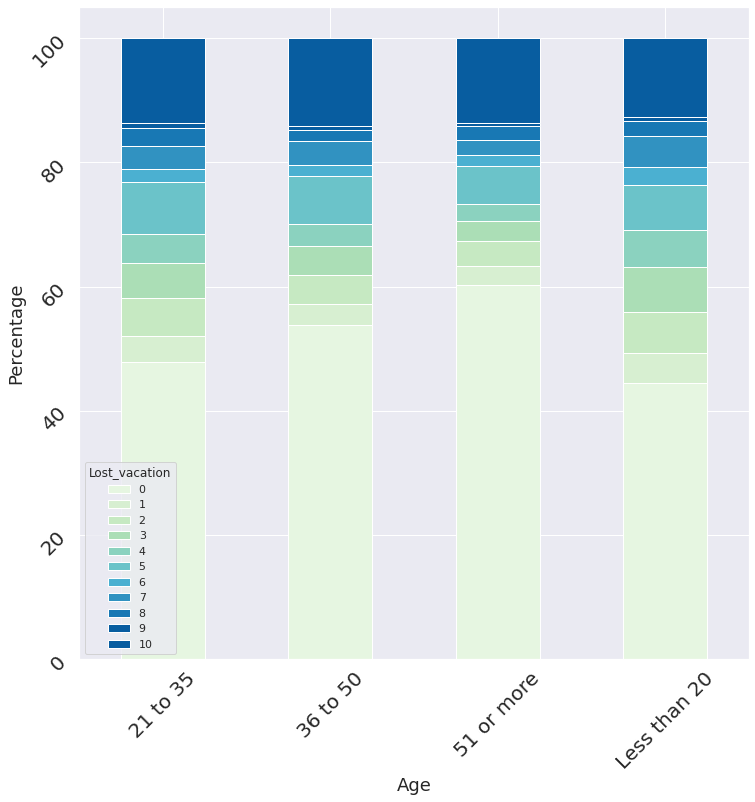

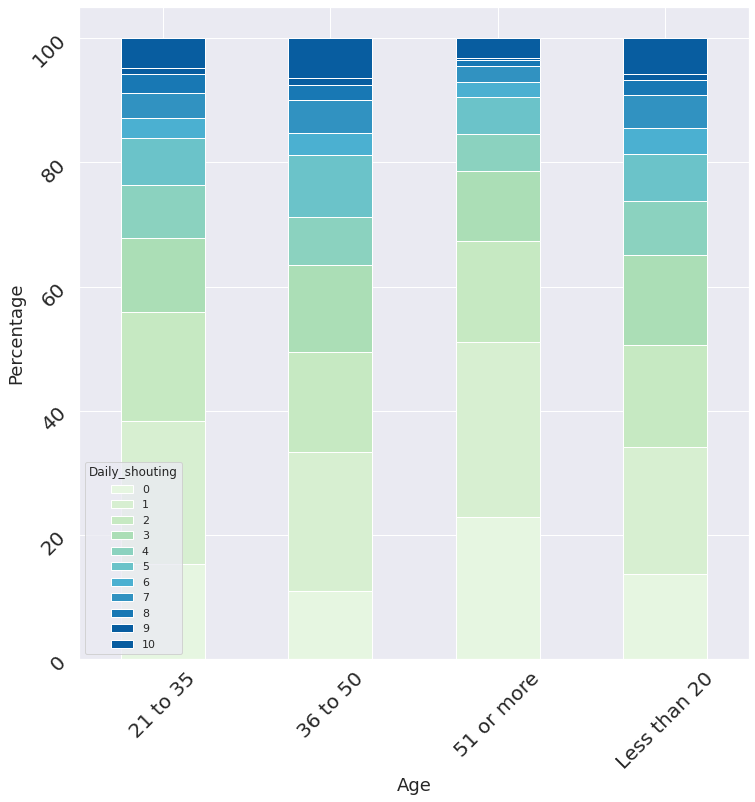

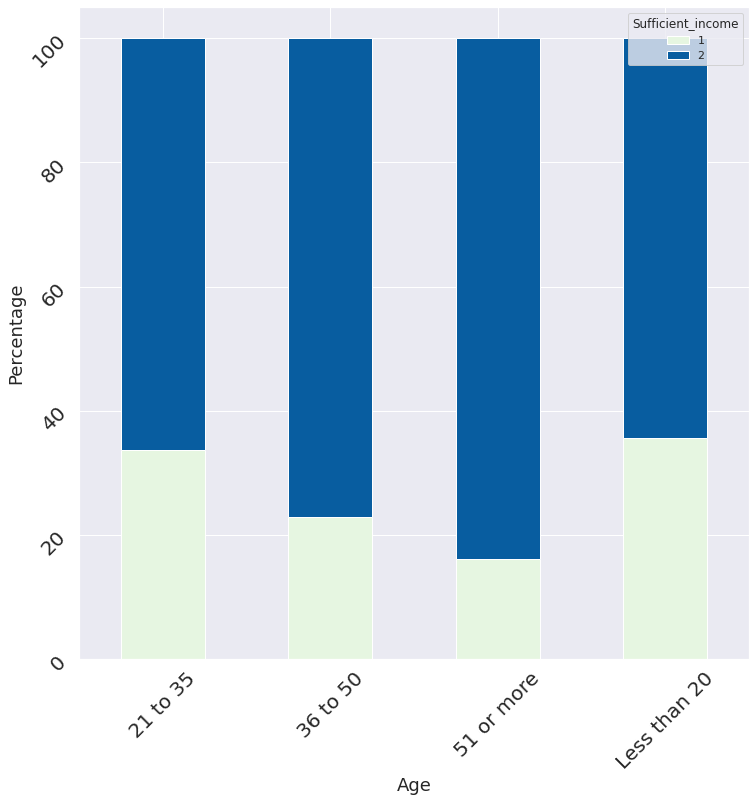

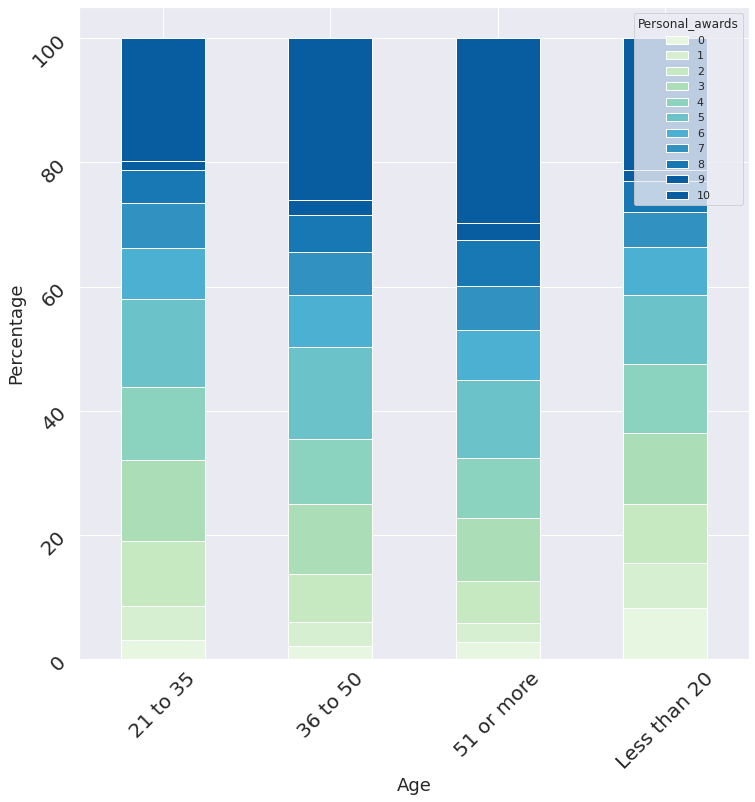

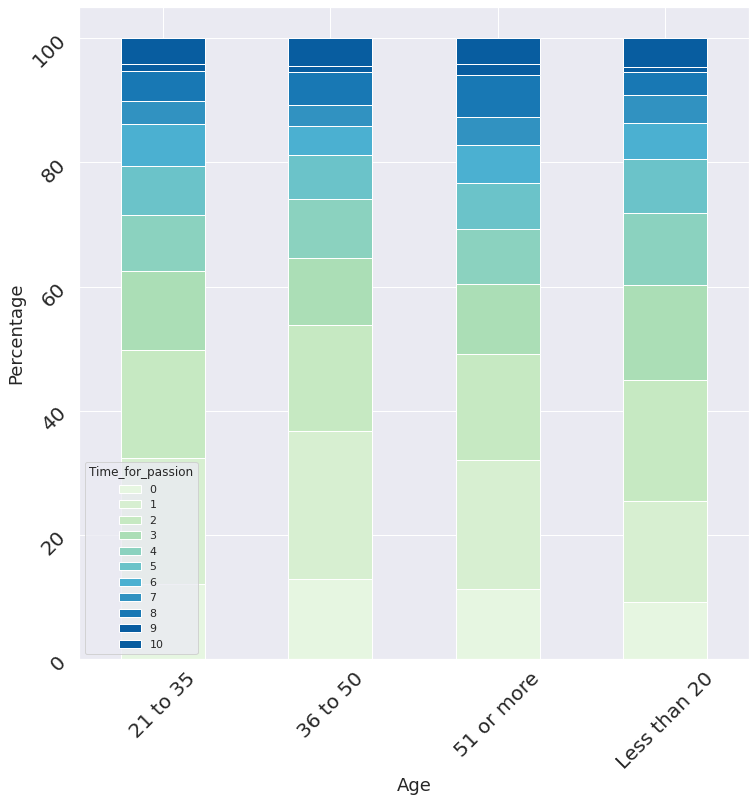

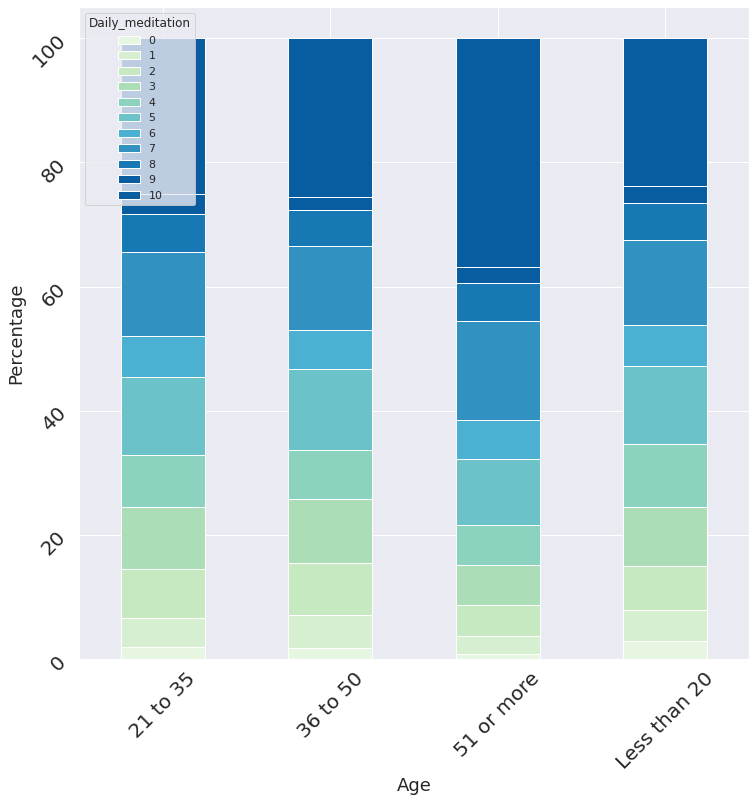

In [42]:
data_perc_per_age=[]

for i,col in enumerate(data_num):
    col=str(col)
    data_age_i=pd.concat([data_num[col],data_age],axis=1).groupby(col).sum()
    data_age_i.index.name=col
    data_age_i=percentage(data_age_i)
    
    data_perc_per_age.append(data_age_i)
    
for df in (data_perc_per_age):
    plotsns(df,df.index, 'Age','Percentage')


# Women are more stressed

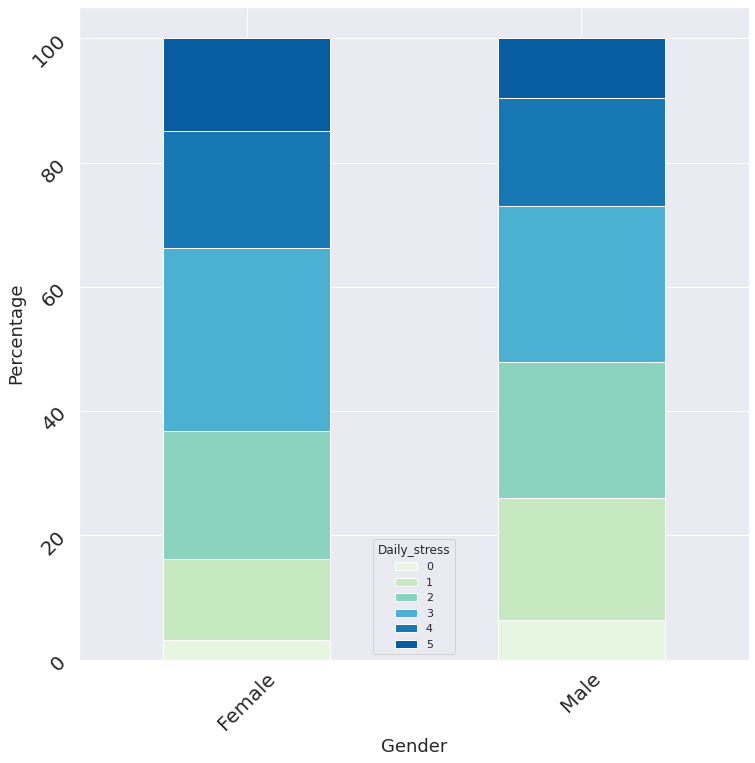

In [48]:
data_gender=pd.concat([data['Daily_stress'],pd.get_dummies(data['Gender'])],axis=1).groupby('Daily_stress').sum()
data_gender=percentage(data_gender)

plotsns(data_gender,data_gender.index,'Gender','Percentage')


# Correlation between the 23 attributes

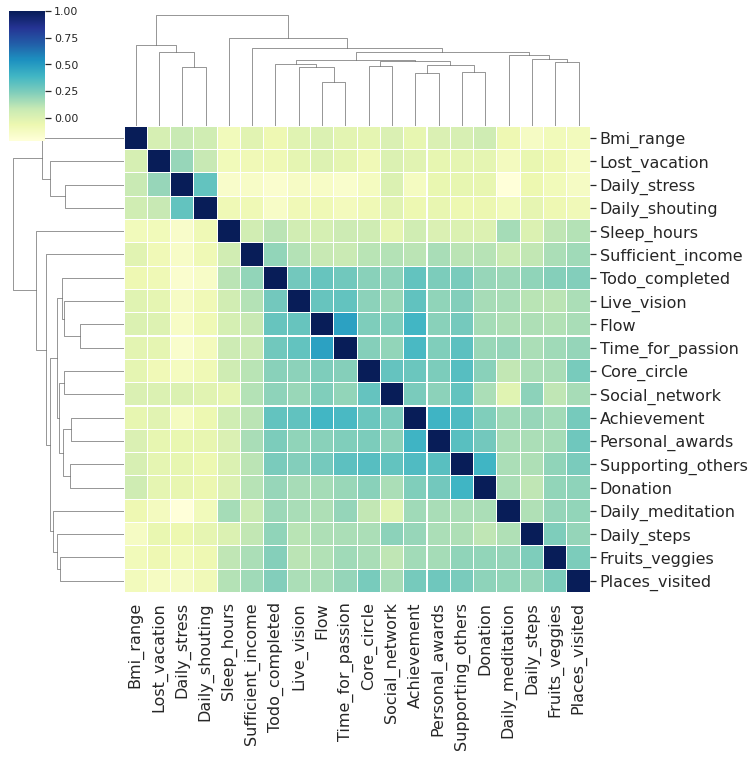

In [43]:
corrmat = data.corr() 
map_corr= sns.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.1)
plt.setp(map_corr.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0) 
map_corr.ax_heatmap.set_xticklabels(map_corr.ax_heatmap.get_xmajorticklabels(), fontsize = 16)
map_corr.ax_heatmap.set_yticklabels(map_corr.ax_heatmap.get_ymajorticklabels(), fontsize = 16)

map_corr
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

### link for the dataset in kaggle: https://www.kaggle.com/ydalat/lifestyle-and-wellbeing-data  
### link for the survey:http://www.authentic-happiness.com/your-life-satisfaction-score